In [338]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [313]:
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1., random_state=67,)

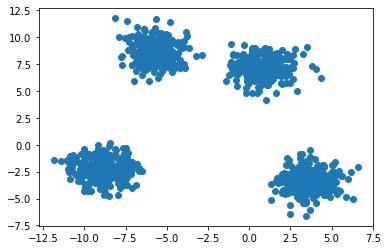

In [314]:
plt.scatter(X[:, 0], X[:, 1])

In [316]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [317]:
class Kmeans:
    def __init__(self, n_clusters:int, max_iter:int):
        if n_clusters <= 0 or not isinstance(n_clusters, int):
            raise ValueError('n must be a positive integer')
            
        if max_iter <= 0 or not isinstance(max_iter, int):
            raise ValueError('max_iter must be a positive integer')
            
        self.k = n_clusters
        self.clusters = np.array([i for i in range(self.k)])
        self.max_iter = max_iter
    
    @staticmethod
    def dist(data, centroids):
        distance = np.sum((np.array(centroids) - data[:, None, :])**2, axis = 2)
        return distance
        
    def init_centeroids(self, X, pdf_method=True):
        centers = []

        initial_index = np.random.choice(range(X.shape[0]), )
        centers.append(X[initial_index, :].tolist())

        for i in range(self.k - 1):
            distance = self.dist(X, np.array(centers))
        
            if i == 0:
                pdf = distance / np.sum(distance)
                centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf.flatten())]
            else:
                dist_min = np.min(distance, axis = 1)
                
                if pdf_method == True:
                    pdf = dist_min / np.sum(dist_min)
                    centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf)]
                else:
                    index_max = np.argmax(dist_min, axis = 0)
                    centroid_new = X[index_max, :]
                    
            centers.append(centroid_new.tolist())
            
        return np.array(centers)
        
    def fit(self, X):
        self.centroids = self.init_centeroids(X)
        self.n_dims = X.shape[1]
        
        for epoch in range(self.max_iter):
            points_clusters = []
        
            for point in X:
                distances = np.linalg.norm(self.centroids - point, axis=1)
                cluster = distances.argsort()[0]    
                points_clusters.append(cluster)

            points_clusters = np.array(points_clusters)

            for i, cluster in enumerate(self.clusters):
                try:
                    self.centroids[i] = [np.mean(X[points_clusters == cluster][:,j]) for j in range(self.n_dims)] 
                except IndexError:
                    continue
                    
        return self
    
    def predict(self, points):
        predicted_clusters = []
        
        for point in points:
            distances = np.linalg.norm(point - self.centroids, axis=1)
            cluster = distances.argsort()[0] 
            
            predicted_clusters.append(cluster)
            
        return np.array(predicted_clusters)            

In [324]:
instance = Kmeans(4, 300).fit(x_train)

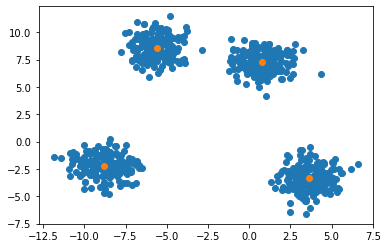

In [325]:
plt.scatter(x_train[:, 0], x_train[:, 1]);
plt.scatter(instance.centroids[:, 0], instance.centroids[:, 1]);

In [326]:
instance.centroids

array([[-5.61998436,  8.59113261],
       [-8.82185503, -2.23181205],
       [ 3.60230499, -3.37502638],
       [ 0.7697071 ,  7.31400674]])

In [327]:
my_predictions = instance.predict(x_val)

In [328]:
my_predictions

array([2, 3, 0, 3, 3, 3, 1, 0, 3, 0, 2, 1, 1, 3, 1, 0, 1, 2, 3, 3, 3, 2,
       2, 0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       1, 2, 0, 3, 1, 1, 0, 0, 0, 3, 0, 3, 1, 0, 1, 0, 2, 0, 3, 1, 3, 2,
       3, 2, 3, 3, 1, 2, 0, 2, 3, 0, 3, 1, 1, 2, 2, 0, 3, 0, 0, 2, 3, 1,
       3, 1, 3, 2, 0, 0, 3, 3, 0, 2, 2, 1, 2, 2, 0, 2, 3, 2, 1, 0, 0, 1,
       3, 2, 3, 3, 0, 2, 3, 3, 2, 0, 0, 1, 0, 1, 3, 1, 1, 0, 0, 1, 0, 1,
       3, 1, 0, 3, 2, 1, 3, 2, 1, 2, 3, 2, 0, 1, 2, 3, 3, 1, 2, 3, 2, 2,
       1, 0, 0, 0, 0, 3, 1, 1, 2, 0, 2, 3, 3, 0, 1, 2, 1, 2, 1, 0, 1, 0,
       0, 3, 0, 1, 2, 1, 2, 3, 3, 3, 2, 3, 0, 1, 0, 3, 0, 1, 2, 3, 3, 1,
       3, 1, 0, 3, 1, 0, 1, 2, 3, 0, 0, 1, 1, 2, 2, 1, 3, 2, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 1, 0, 3, 1, 2, 0, 2, 1, 1, 0, 2, 3, 3, 3, 0, 1, 3,
       3, 2, 3, 2, 0, 3, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 3, 1,
       1, 3, 3, 3, 2, 2, 2, 1, 2, 3, 2, 3, 3, 1, 1, 1, 1, 2, 0, 1, 0, 3,
       3, 1, 0, 3, 0, 1, 1, 0, 3, 0, 0, 0, 3, 2])

In [342]:
silhouette_score(y_val.reshape(-1, 1), my_predictions)

1.0

In [330]:
instance = KMeans(n_clusters = 4)
instance.fit(X)

KMeans(n_clusters=4)

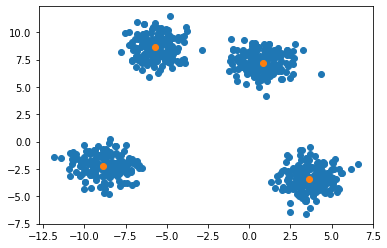

In [331]:
plt.scatter(x_train[:, 0], x_train[:, 1]);
plt.scatter(instance.cluster_centers_[:, 0], instance.cluster_centers_[:, 1]);

In [332]:
instance.cluster_centers_

array([[-5.68672173,  8.64868295],
       [ 3.61598473, -3.38299416],
       [-8.87296037, -2.26574761],
       [ 0.81340971,  7.20791546]])

In [333]:
sklearn_predictions = instance.predict(x_val)

In [334]:
sklearn_predictions

array([1, 3, 0, 3, 3, 3, 2, 0, 3, 0, 1, 2, 2, 3, 2, 0, 2, 1, 3, 3, 3, 1,
       1, 0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2,
       2, 1, 0, 3, 2, 2, 0, 0, 0, 3, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3, 1,
       3, 1, 3, 3, 2, 1, 0, 1, 3, 0, 3, 2, 2, 1, 1, 0, 3, 0, 0, 1, 3, 2,
       3, 2, 3, 1, 0, 0, 3, 3, 0, 1, 1, 2, 1, 1, 0, 1, 3, 1, 2, 0, 0, 2,
       3, 1, 3, 3, 0, 1, 3, 3, 1, 0, 0, 2, 0, 2, 3, 2, 2, 0, 0, 2, 0, 2,
       3, 2, 0, 3, 1, 2, 3, 1, 2, 1, 3, 1, 0, 2, 1, 3, 3, 2, 1, 3, 1, 1,
       2, 0, 0, 0, 0, 3, 2, 2, 1, 0, 1, 3, 3, 0, 2, 1, 2, 1, 2, 0, 2, 0,
       0, 3, 0, 2, 1, 2, 1, 3, 3, 3, 1, 3, 0, 2, 0, 3, 0, 2, 1, 3, 3, 2,
       3, 2, 0, 3, 2, 0, 2, 1, 3, 0, 0, 2, 2, 1, 1, 2, 3, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 2, 0, 3, 2, 1, 0, 1, 2, 2, 0, 1, 3, 3, 3, 0, 2, 3,
       3, 1, 3, 1, 0, 3, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 3, 2,
       2, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 3, 3, 2, 2, 2, 2, 1, 0, 2, 0, 3,
       3, 2, 0, 3, 0, 2, 2, 0, 3, 0, 0, 0, 3, 1], d

In [341]:
silhouette_score(y_val.reshape(-1, 1), sklearn_predictions)

1.0